<a href="https://colab.research.google.com/github/RPJ123/pulmonary-embolism/blob/main/PeModelTrainingResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

training_set = train_datagen.flow_from_directory('PE_dataset/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary'
                                                )

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('PE_dataset/val',
                                            target_size = (256, 256),
                                            batch_size = 1,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Resnet50

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)

feature_extractor = Model(inputs=base_model.input, outputs=x)

#feature_extractor = Model(inputs=base_model.input, outputs=Flatten()(base_model.output))

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
feature_extractor.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,112,256 (91.98 MB)

 Trainable params: 524,544 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_features = feature_extractor.predict(training_set)
test_features = feature_extractor.predict(test_set)

train_labels = training_set.classes
test_labels = test_set.classes

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)

250/250 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 442s 220ms/step


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Accuracy of KNN classifier: 0.51


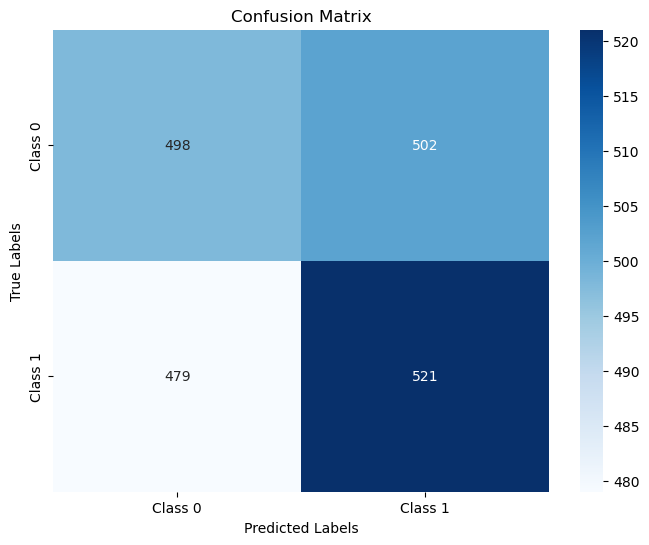

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.51      0.50      0.50      1000
     Class 1       0.51      0.52      0.52      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



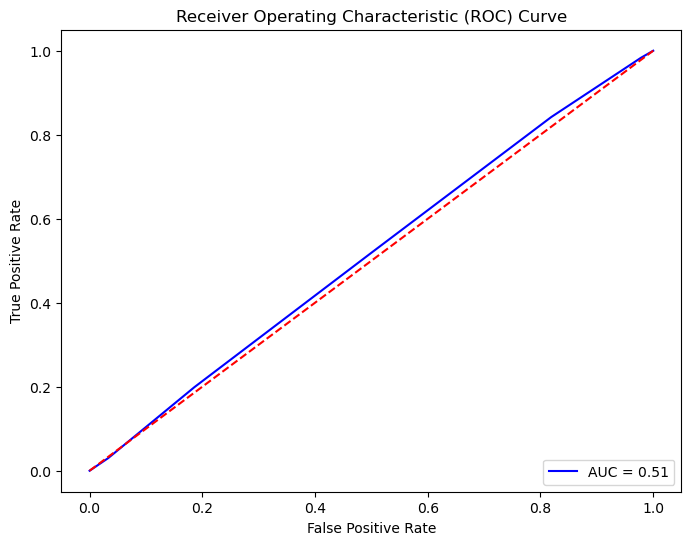

Cross-Validation Scores: [0.48875  0.48625  0.49625  0.504375 0.500625]
Mean CV Accuracy: 0.50
Standard Deviation: 0.01


In [ ]:
predictions = knn.predict(test_features)

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")

conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

class_report = classification_report(test_labels, predictions, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

probs = knn.predict_proba(test_features)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(test_labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, train_features, train_labels, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Accuracy of Random Forest classifier: 0.50


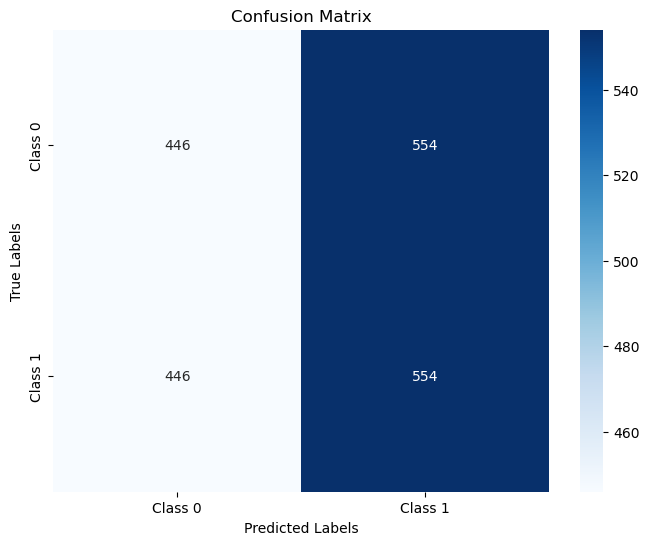

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.50      0.45      0.47      1000
     Class 1       0.50      0.55      0.53      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



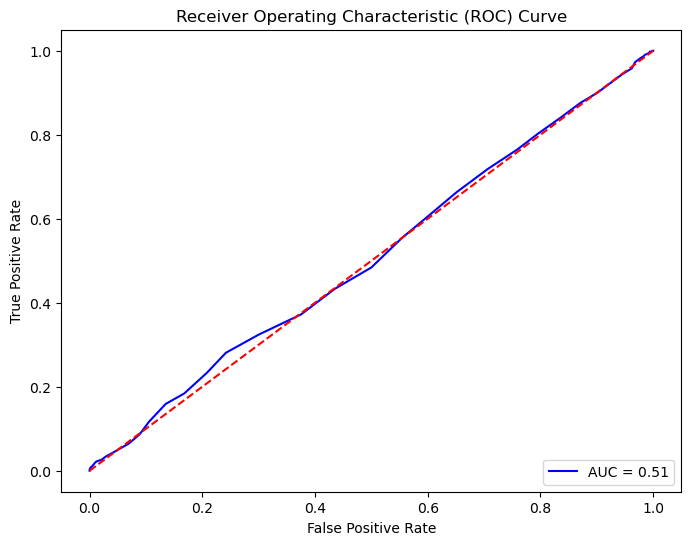

In [ ]:
# Train a Random Forest classifier on the extracted features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)

# Make predictions
predictions = rf.predict(test_features)

# Evaluate the Random Forest model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of Random Forest classifier: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
class_report = classification_report(test_labels, predictions, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

# ROC Curve and AUC
probs = rf.predict_proba(test_features)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(test_labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# # Feature Importance
# feature_importances = rf.feature_importances_
# plt.figure(figsize=(12, 6))
# plt.bar(range(len(feature_importances)), feature_importances)
# plt.title('Feature Importances')
# plt.xlabel('Feature Index')
# plt.ylabel('Importance Score')
# plt.show()

In [ ]:
from xgboost import XGBClassifier

C:\Users\Vyshnav\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:34:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost classifier (with pooling): 0.52


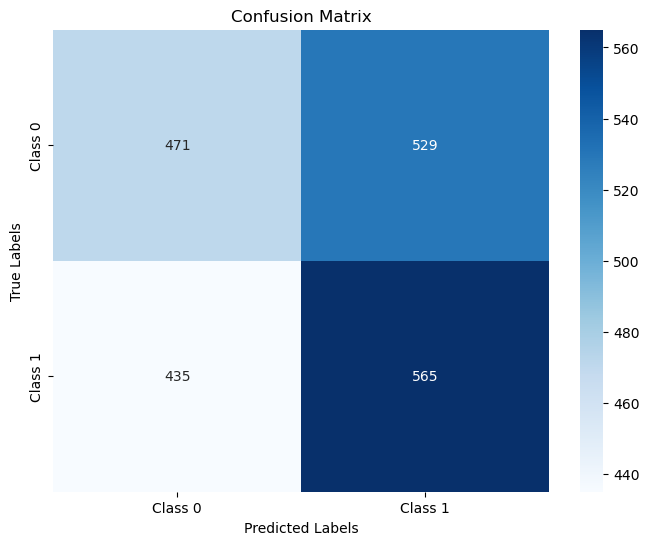

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.52      0.47      0.49      1000
     Class 1       0.52      0.56      0.54      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



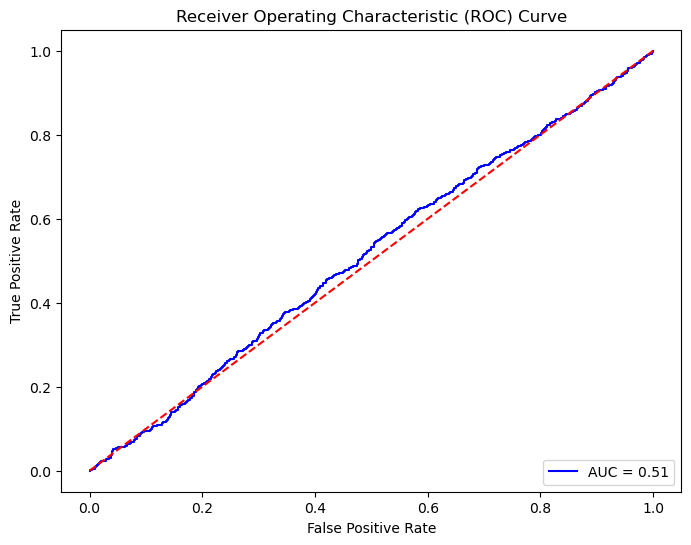

In [ ]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(train_features, train_labels)

# Make predictions
probs = xgb.predict_proba(test_features)[:, 1]
binary_predictions = (probs >= 0.5).astype(int)

# Evaluate the XGBoost model
accuracy = accuracy_score(test_labels, binary_predictions)
print(f"Accuracy of XGBoost classifier (with pooling): {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
class_report = classification_report(test_labels, binary_predictions, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()